# Day 6 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of Exported.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Plot the null values as bars
3. Create a copy of the data frame and drop the NAN values
3. Use the other copy to fill-in NAN values.
4. Which option do you prefer to work with regarding the relationship with PHIE and DT or PHIE and RHOB



In [1]:
!pip install lasio

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
F02_1 = lasio.read(r"F:\GeoML-2\GeoML-2.0\10DaysChallenge\Dutch_F3_Logs\F02-1_logs.las")

In [4]:
df = F02_1.df()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9680 entries, 48.0 to 1499.8501
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    8253 non-null   float64
 1   DT      9680 non-null   float64
 2   GR      9666 non-null   float64
 3   AI      9680 non-null   float64
 4   AI_REL  9680 non-null   float64
 5   PHIE    4906 non-null   float64
dtypes: float64(6)
memory usage: 529.4 KB


,RHOB,DT,GR,AI,AI_REL,PHIE
count,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


<AxesSubplot:title={'center':'Missing Values Comparison'}>

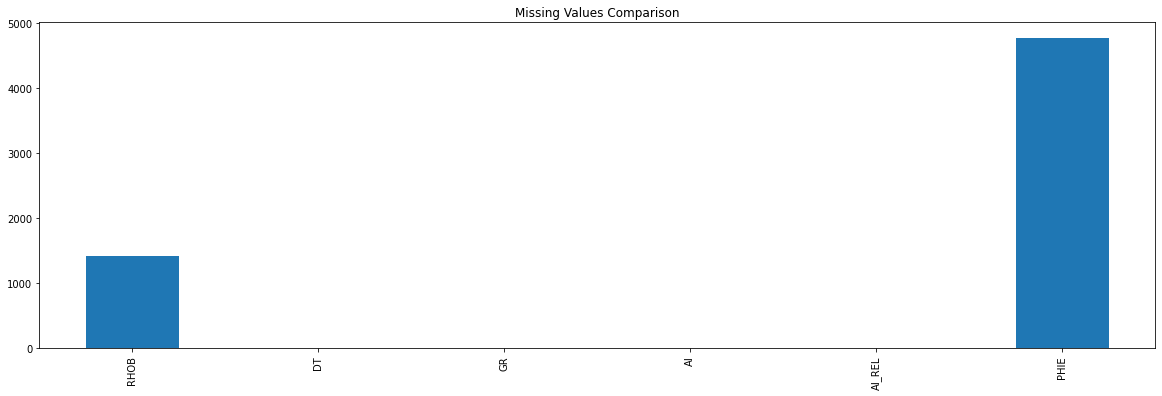

In [5]:
df.isnull().sum().plot(kind = 'bar', title = 'Missing Values Comparison', figsize=(20,6))

In [7]:
df_clean=df.copy()
print('original df =',df_clean.shape)
df_clean.dropna(inplace=True)
print('after removing nans =',df_clean.shape)
print('=' *100)
print('This dataset has {0} rows and {1} columns'.format(df_clean.shape[0],df_clean.shape[1]))

original df = (9680, 6)
after removing nans = (4906, 6)
This dataset has 4906 rows and 6 columns


In [8]:
df_1=df

In [9]:
df_mean=df_1.copy()

In [10]:
df_mean['RHOB']=df_mean['RHOB'].fillna(df_mean['RHOB'].mean())
df_mean['GR']=df_mean['GR'].fillna(df_mean['GR'].mean())
df_mean['PHIE']=df_mean['PHIE'].fillna(df_mean['PHIE'].mean())
display('after filling nans',df_mean)

'after filling nans'

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.0000,1975.091074,524.0485,46.613531,3820257.00,-455.6956,0.304522
48.1500,1975.091074,524.0410,46.613531,3820311.75,-455.6956,0.304522
48.3000,1975.091074,524.0336,46.613531,3820366.25,-455.6956,0.304522
48.4500,1975.091074,524.0262,46.613531,3820419.75,-455.6956,0.304522
48.6000,1975.091074,524.0190,46.613531,3820472.25,-455.6956,0.304522
...,...,...,...,...,...,...
1499.2500,1787.544400,532.1727,27.627300,3359011.00,-239115.9375,0.304522
1499.4000,1814.169100,534.8610,28.528100,3391772.00,-239115.9375,0.304522
1499.5500,1861.649700,537.1902,28.581300,3465524.00,-239115.9375,0.304522


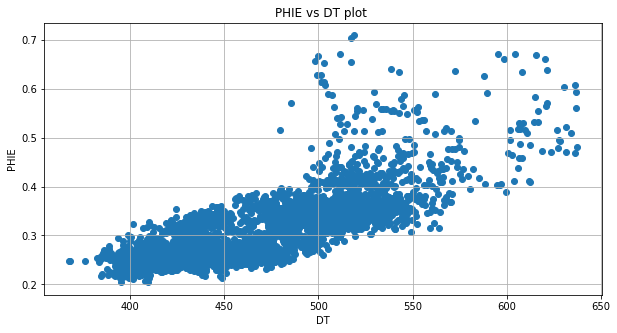

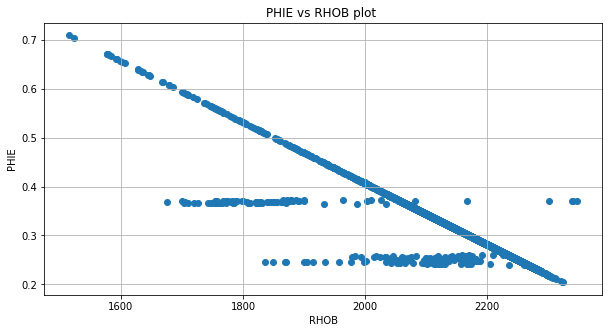

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(df_clean.DT, df_clean.PHIE)
plt.title('PHIE vs DT plot ')
plt.xlabel('DT')
plt.ylabel('PHIE')
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.scatter(df_clean.RHOB, df_clean.PHIE)
plt.title('PHIE vs RHOB plot ')
plt.xlabel('RHOB')
plt.ylabel('PHIE')
plt.grid()
plt.show();

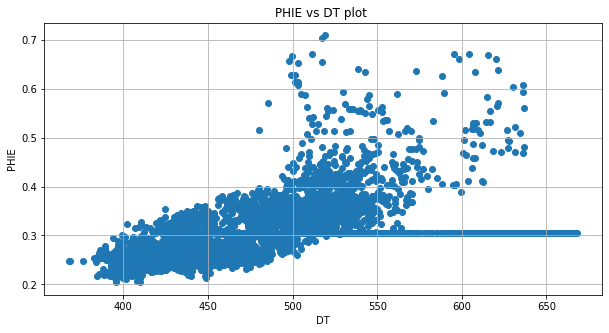

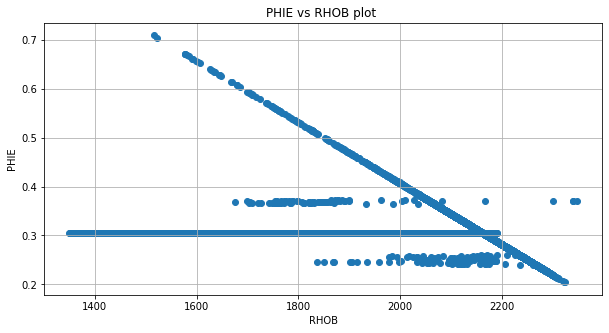

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(df_mean.DT, df_mean.PHIE)
plt.title('PHIE vs DT plot ')
plt.xlabel('DT')
plt.ylabel('PHIE')
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.scatter(df_mean.RHOB, df_mean.PHIE)
plt.title('PHIE vs RHOB plot ')
plt.xlabel('RHOB')
plt.ylabel('PHIE')
plt.grid()
plt.show();

In [17]:
#i prefer to work with clean data without null vlaues